# Step 1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import seaborn as sns


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RAJI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Step 2: Load data

In [2]:
df=pd.read_excel("C:/Users/RAJI/Downloads/cust_data.xlsx")

# Step 3: View the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [5]:
df.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,F,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,M,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,F,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


array([[<Axes: title={'center': 'Cust_ID'}>,
        <Axes: title={'center': 'Orders'}>,
        <Axes: title={'center': 'Jordan'}>,
        <Axes: title={'center': 'Gatorade'}>,
        <Axes: title={'center': 'Samsung'}>,
        <Axes: title={'center': 'Asus'}>],
       [<Axes: title={'center': 'Udis'}>,
        <Axes: title={'center': 'Mondelez International'}>,
        <Axes: title={'center': 'Wrangler'}>,
        <Axes: title={'center': 'Vans'}>,
        <Axes: title={'center': 'Fila'}>,
        <Axes: title={'center': 'Brooks'}>],
       [<Axes: title={'center': 'H&M'}>,
        <Axes: title={'center': 'Dairy Queen'}>,
        <Axes: title={'center': 'Fendi'}>,
        <Axes: title={'center': 'Hewlett Packard'}>,
        <Axes: title={'center': 'Pladis'}>,
        <Axes: title={'center': 'Asics'}>],
       [<Axes: title={'center': 'Siemens'}>,
        <Axes: title={'center': 'J.M. Smucker'}>,
        <Axes: title={'center': 'Pop Chips'}>,
        <Axes: title={'center': 'Juniper

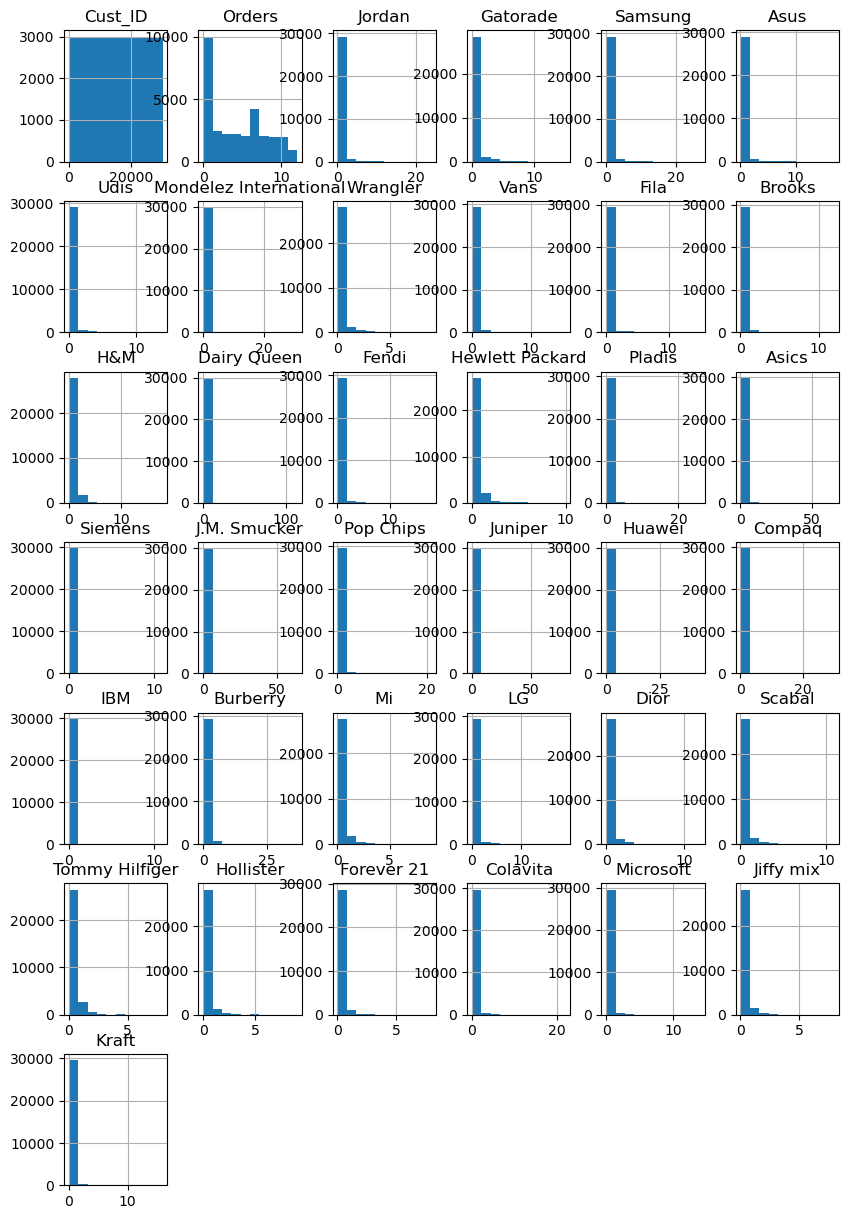

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,15
df.hist()

# Step 4:Data Cleaning

In [7]:
#null value filling
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

<Axes: >

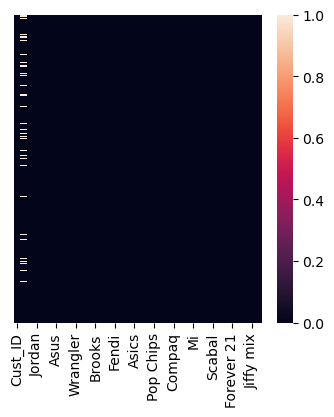

In [8]:
rcParams['figure.figsize'] = 4,4
sns.heatmap(df.isnull(), yticklabels = False)

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df.isnull().sum().sum()

0

<Axes: >

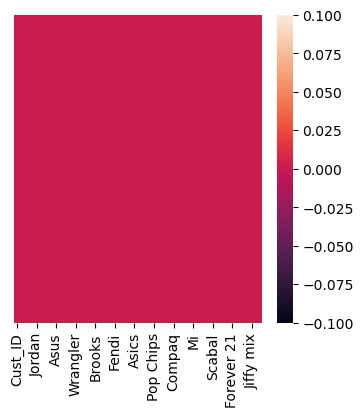

In [10]:
rcParams['figure.figsize'] = 4,4
sns.heatmap(df.isnull(), yticklabels = False)

In [11]:
#encoding 
df["Gender"] = df['Gender'].map({'M':1, 'F':2})

In [12]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [13]:
#removal of unnecessary column data
df1=df.copy(deep=True)
df1.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [14]:
df1.drop(columns = ['Cust_ID','Gender','Orders'],axis=1, inplace = True)

In [15]:
df1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [16]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df2=scale.fit_transform(df1)
df2=scale.transform(df2)
df2=pd.DataFrame(df2,columns=df1.columns)
df2.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,6.085945,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
1,-0.745244,1.145025,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,1.047660,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
2,-0.745244,1.145025,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,4.170317,-0.772707,-0.653955
3,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,-1.131237,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,-0.772707,-0.653955
4,-0.745244,-0.864913,-0.507824,-0.512609,-0.572896,-0.771289,-0.609026,-0.574448,-0.510924,-0.928311,...,-0.644261,-0.910232,2.345508,-0.921316,-0.731053,-0.827772,-0.767051,-0.844088,5.500158,5.991747


# Step 5: Visualization

In [17]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Gender', ylabel='Cust_ID'>

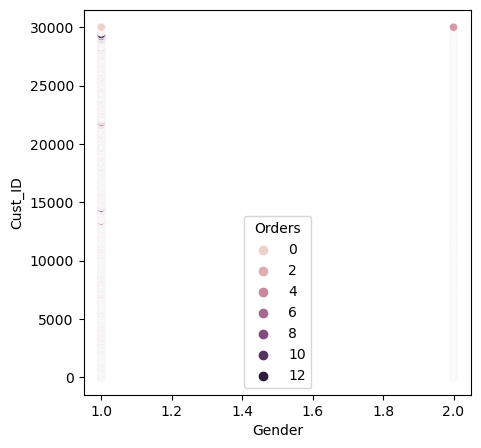

In [18]:
rcParams['figure.figsize'] = 5,5
sns.scatterplot(data=df,x="Gender",y="Cust_ID",hue="Orders",color="black")

<Axes: xlabel='Orders', ylabel='Density'>

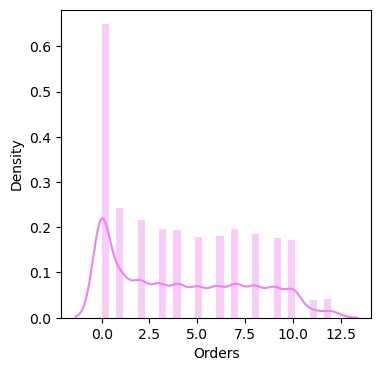

In [19]:
rcParams['figure.figsize'] = 4,4
sns.distplot(df['Orders'],color='violet')

<Axes: xlabel='Gender', ylabel='Orders'>

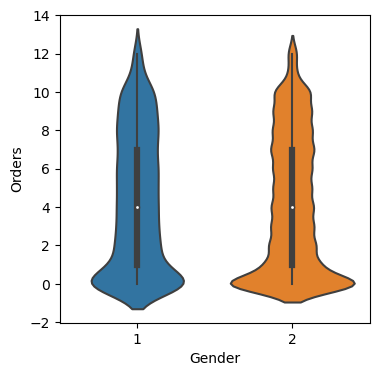

In [20]:
sns.violinplot(data=df,x="Gender",y="Orders")

# Step 6: K value finding

In [25]:
#pip install yellowbrick
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

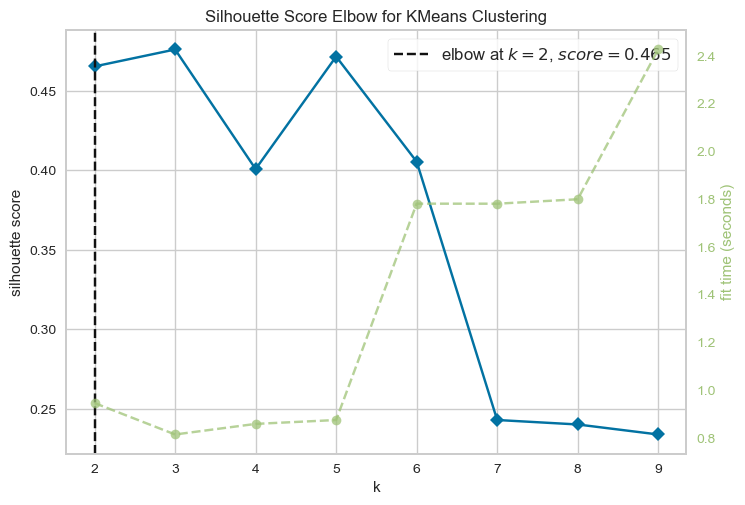

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [22]:
# KELbowVisualizer Library
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df2)        
visualizer.show()  

In [29]:
n_clusters=[2,3,4,5,6,7,8,9]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df2)
    
    score=silhouette_score(df2,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score = {})".format(k, score))

For n_clusters = 2, silhouette score = 0.46545104718457675)
For n_clusters = 3, silhouette score = 0.47611441867764753)
For n_clusters = 4, silhouette score = 0.4008524567474968)
For n_clusters = 5, silhouette score = 0.47184527175570484)
For n_clusters = 6, silhouette score = 0.368586463740071)
For n_clusters = 7, silhouette score = 0.2372623075948265)
For n_clusters = 8, silhouette score = 0.22829692587631675)
For n_clusters = 9, silhouette score = 0.23678306159747844)


In [31]:
from sklearn.datasets import make_blobs
df2, y = make_blobs(n_samples=30000, n_features=35, centers=4, random_state=10)
for n_clusters in range(2,10):
    km=KMeans(n_clusters=n_clusters, random_state=10)
    result=km.fit_predict(df2)
    score=silhouette_score(df2,result,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4973726949479975)
For n_clusters = 3, silhouette score is 0.6214665771968824)
For n_clusters = 4, silhouette score is 0.7973718598449924)
For n_clusters = 5, silhouette score is 0.6033460180865866)
For n_clusters = 6, silhouette score is 0.4093496625000387)
For n_clusters = 7, silhouette score is 0.21376150086431223)
For n_clusters = 8, silhouette score is 0.21366840121266262)
For n_clusters = 9, silhouette score is 0.019717530819101527)


# Step 7: Model fitting

In [34]:
#For n_clusters = 4, silhouette score is 0.7973718598449924) shows high score
#score>0.5

kmeans=KMeans(n_clusters=4)
kmeans.fit(df2)
prediction=kmeans.predict(df2)
df["prediction"]=prediction
prediction

array([0, 3, 3, ..., 1, 0, 3])

<Axes: xlabel='prediction', ylabel='Density'>

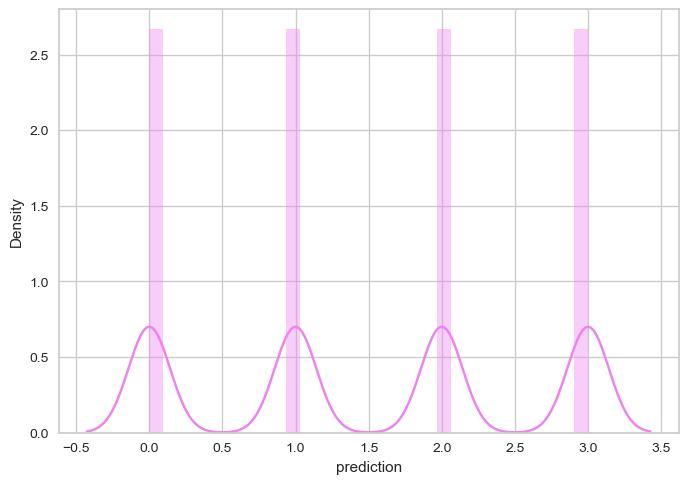

In [37]:
sns.distplot(df['prediction'],color='violet')

In [38]:
#for just comparison(testing)
#For n_clusters = 3, silhouette score is 0.6214665771968824)

kmeans=KMeans(n_clusters=3)
kmeans.fit(df2)
prediction_1=kmeans.predict(df2)
df["prediction_1"]=prediction_1
prediction_1

array([2, 1, 1, ..., 0, 2, 1])

<Axes: xlabel='prediction_1', ylabel='Density'>

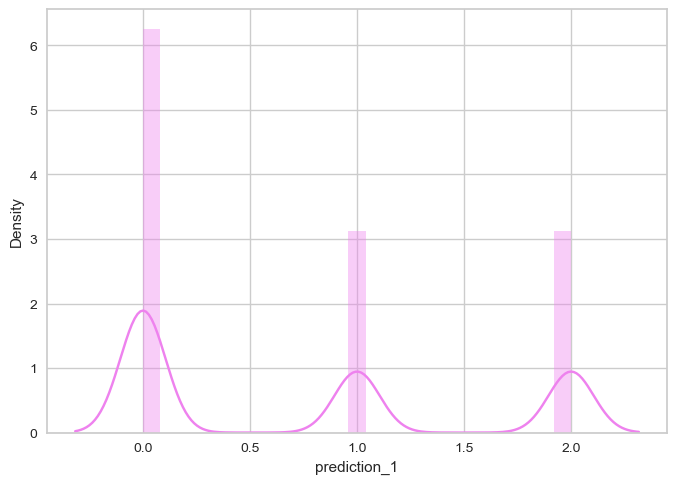

In [39]:
sns.distplot(df['prediction_1'],color='violet')

In [44]:
df_clus=pd.DataFrame(df2,columns=df1.columns)
df_clus.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-3.021725,-6.282136,5.269298,-8.331039,2.289132,1.921251,6.576322,-6.576440,7.299631,-0.551333,...,1.901948,8.003705,-1.188154,1.986576,-9.259842,-3.222441,-7.021747,-5.288518,-3.648399,3.473388
1,-8.628056,-0.072757,-4.253152,3.469426,-3.609697,-8.525991,7.722782,4.822893,7.019354,-1.417237,...,1.128978,10.937053,-0.143279,-5.172407,0.924979,3.318927,8.587828,-8.164176,-1.495283,4.229713
2,-6.774183,-1.142317,-4.664649,1.076938,-3.269361,-8.543233,6.171494,5.207027,6.402913,-3.262492,...,1.139370,9.739918,-1.858297,-2.790464,2.530591,1.320467,6.452944,-8.787186,-1.651893,5.325249
3,5.357653,2.653253,-8.078155,-2.988251,0.017476,-5.202405,2.254722,4.699439,-7.696242,-9.150901,...,-4.487674,0.956435,-4.242077,-1.139826,8.678621,9.421607,1.677795,-0.904681,-10.834907,9.749453
4,4.246319,2.142999,-8.504896,-2.176725,0.812748,-5.131568,0.109314,4.590291,-5.754036,-8.739704,...,-3.829273,1.408440,-6.863312,-2.016293,10.136830,7.902266,1.182977,0.424041,-11.349806,9.587278


In [45]:
df_clus['cluster'] =prediction
df_clus.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,-3.021725,-6.282136,5.269298,-8.331039,2.289132,1.921251,6.576322,-6.576440,7.299631,-0.551333,...,8.003705,-1.188154,1.986576,-9.259842,-3.222441,-7.021747,-5.288518,-3.648399,3.473388,0
1,-8.628056,-0.072757,-4.253152,3.469426,-3.609697,-8.525991,7.722782,4.822893,7.019354,-1.417237,...,10.937053,-0.143279,-5.172407,0.924979,3.318927,8.587828,-8.164176,-1.495283,4.229713,3
2,-6.774183,-1.142317,-4.664649,1.076938,-3.269361,-8.543233,6.171494,5.207027,6.402913,-3.262492,...,9.739918,-1.858297,-2.790464,2.530591,1.320467,6.452944,-8.787186,-1.651893,5.325249,3
3,5.357653,2.653253,-8.078155,-2.988251,0.017476,-5.202405,2.254722,4.699439,-7.696242,-9.150901,...,0.956435,-4.242077,-1.139826,8.678621,9.421607,1.677795,-0.904681,-10.834907,9.749453,1
4,4.246319,2.142999,-8.504896,-2.176725,0.812748,-5.131568,0.109314,4.590291,-5.754036,-8.739704,...,1.408440,-6.863312,-2.016293,10.136830,7.902266,1.182977,0.424041,-11.349806,9.587278,1


In [46]:
model.cluster_centers_

array([[-9.19463423, -1.41001437, -3.71054372,  2.72276486, -3.07339119,
        -9.12554269,  7.58577779,  5.26630002,  7.56516091, -1.63430332,
         2.13944449,  0.26772406,  1.94631794, -4.75780574, -3.98130412,
        -9.49339644, -3.94012689, -5.16699438,  1.14749759,  1.31868341,
        -0.50063179, -4.138615  , -8.71816852,  9.58108959, -3.20250013,
        -0.0832489 ,  9.53511044, -1.20816994, -3.62821705,  0.39400039,
         1.56634031,  7.07610642, -8.64153711, -0.71613325,  5.64307036],
       [ 5.42525782, -9.57602898,  2.66597818,  4.96883406, -0.03657404,
        -5.50253436, -6.04243012,  5.21904856, -6.6403918 , -8.2341336 ,
         3.71584254,  9.06360059, -9.92644026,  0.22994172,  6.26923846,
         2.26922479,  4.45356143, -4.15448429,  8.33676182,  4.27718094,
         0.85586483, -7.15436271, -2.52125731,  3.46222328, -1.1660487 ,
        -1.32209687,  2.35854098,  0.236452  ,  3.02142528,  2.01111008,
         6.1189417 ,  0.41092316,  8.17291731, -3.

In [47]:
cluster_center=pd.DataFrame(model.cluster_centers_,columns=df_clus.columns[:35])
cluster_center.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-9.194634,-1.410014,-3.710544,2.722765,-3.073391,-9.125543,7.585778,5.266300,7.565161,-1.634303,...,-0.083249,9.535110,-1.208170,-3.628217,0.394000,1.566340,7.076106,-8.641537,-0.716133,5.643070
1,5.425258,-9.576029,2.665978,4.968834,-0.036574,-5.502534,-6.042430,5.219049,-6.640392,-8.234134,...,-1.322097,2.358541,0.236452,3.021425,2.011110,6.118942,0.410923,8.172917,-3.629746,-8.187937
2,-3.970695,-7.716260,6.578182,-9.070186,2.533719,0.952938,6.385118,-6.026121,7.124559,-2.947028,...,1.965043,8.061645,0.664408,1.795159,-9.195869,-2.849144,-8.411960,-3.884682,-3.369298,5.499859
3,4.379543,1.721561,-9.253141,-2.976846,1.275248,-4.013101,0.247002,3.465931,-6.822483,-8.983865,...,-5.048869,0.845788,-5.464405,-2.385907,8.449809,8.511175,1.315130,0.664953,-9.692382,9.557663


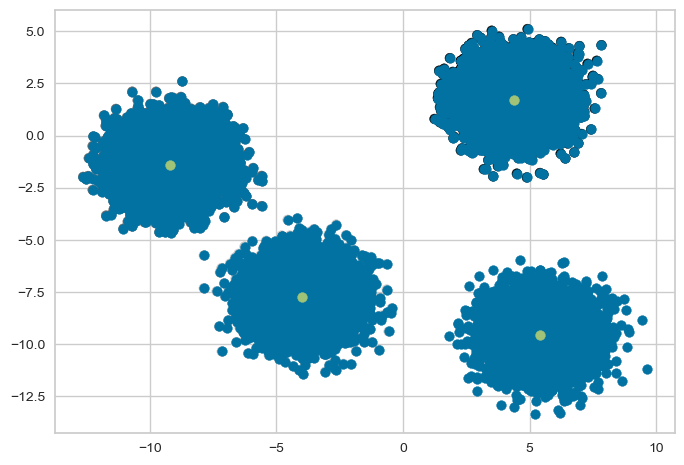

In [57]:
plt.scatter(df2[:,0],df2[:,1],c=y_kmeans,s=50)
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200);
kmeans=KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=1)
pred_y=kmeans.fit_predict(df2)
plt.scatter(df2[:,0],df2[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50)
plt.show()

# Step 8: Segmenting 

In [59]:
# CLUSTER_1
sorted(zip(list(cluster_center.iloc[0,:]),list(cluster_center.columns)),reverse=True)

[(9.581089586683724, 'Burberry'),
 (9.535110443611083, 'Dior'),
 (7.585777786921038, 'Wrangler'),
 (7.565160914325458, 'Fila'),
 (7.076106420382154, 'Colavita'),
 (5.643070363076578, 'Kraft'),
 (5.266300017439283, 'Vans'),
 (2.7227648637843664, 'Asus'),
 (2.139444486236431, 'H&M'),
 (1.9463179369117194, 'Fendi'),
 (1.566340307045344, 'Forever 21'),
 (1.3186834087638326, 'Juniper'),
 (1.1474975851910725, 'Pop Chips'),
 (0.3940003919273012, 'Hollister'),
 (0.2677240590724125, 'Dairy Queen'),
 (-0.08324890093581039, 'LG'),
 (-0.5006317900804387, 'Huawei'),
 (-0.71613325029992, 'Jiffy mix'),
 (-1.2081699410526707, 'Scabal'),
 (-1.4100143734860713, 'Gatorade'),
 (-1.6343033194882146, 'Brooks'),
 (-3.0733911910009843, 'Udis'),
 (-3.2025001274950724, 'Mi'),
 (-3.628217051492128, 'Tommy Hilfiger'),
 (-3.7105437192667243, 'Samsung'),
 (-3.940126890914196, 'Siemens'),
 (-3.981304122704552, 'Pladis'),
 (-4.138614996699962, 'Compaq'),
 (-4.757805738117175, 'Hewlett Packard'),
 (-5.1669943814398795

In [60]:
# CLUSTER_2
sorted(zip(list(cluster_center.iloc[1,:]),list(cluster_center.columns)),reverse=True)

[(9.063600585912399, 'Dairy Queen'),
 (8.336761822483645, 'Pop Chips'),
 (8.172917308790888, 'Microsoft'),
 (6.269238457481028, 'Pladis'),
 (6.118941701022445, 'Forever 21'),
 (5.4252578170108, 'Jordan'),
 (5.219048562898288, 'Vans'),
 (4.968834060513252, 'Asus'),
 (4.453561433194705, 'Siemens'),
 (4.277180943358574, 'Juniper'),
 (3.7158425384617817, 'H&M'),
 (3.462223277135112, 'Burberry'),
 (3.021425279567533, 'Tommy Hilfiger'),
 (2.665978175499282, 'Samsung'),
 (2.3585409814859335, 'Dior'),
 (2.2692247898047944, 'Asics'),
 (2.011110080789257, 'Hollister'),
 (0.8558648327773943, 'Huawei'),
 (0.4109231633350886, 'Colavita'),
 (0.23645200171924152, 'Scabal'),
 (0.22994171736622193, 'Hewlett Packard'),
 (-0.036574035442841824, 'Udis'),
 (-1.166048698923876, 'Mi'),
 (-1.3220968746410744, 'LG'),
 (-2.5212573053728975, 'IBM'),
 (-3.629746198609589, 'Jiffy mix'),
 (-4.154484290951313, 'J.M. Smucker'),
 (-5.502534359933534, 'Mondelez International'),
 (-6.042430118617085, 'Wrangler'),
 (-6.6

In [61]:
# CLUSTER_3
sorted(zip(list(cluster_center.iloc[2,:]),list(cluster_center.columns)),reverse=True)

[(9.74869880497805, 'Compaq'),
 (8.890590750623247, 'Huawei'),
 (8.061645284280793, 'Dior'),
 (7.6806395410345285, 'Fendi'),
 (7.1245587240253645, 'Fila'),
 (6.578181650007252, 'Samsung'),
 (6.53297747188291, 'Burberry'),
 (6.426006662274009, 'J.M. Smucker'),
 (6.385117731976182, 'Wrangler'),
 (5.499858788791791, 'Kraft'),
 (5.106868549800038, 'H&M'),
 (2.5337191565001413, 'Udis'),
 (1.9650427542947926, 'LG'),
 (1.7951587570005516, 'Tommy Hilfiger'),
 (0.9529382754392879, 'Mondelez International'),
 (0.6644079430763972, 'Scabal'),
 (-0.8706695339707373, 'IBM'),
 (-2.1618961985745186, 'Asics'),
 (-2.323692584283641, 'Juniper'),
 (-2.849143888353443, 'Forever 21'),
 (-2.9470284123579487, 'Brooks'),
 (-3.369298473109299, 'Jiffy mix'),
 (-3.491493697454244, 'Hewlett Packard'),
 (-3.8846818356509365, 'Microsoft'),
 (-3.9706949338534665, 'Jordan'),
 (-4.058422531525046, 'Dairy Queen'),
 (-4.970298220169599, 'Mi'),
 (-6.026121063001321, 'Vans'),
 (-6.7032173071192585, 'Pladis'),
 (-6.98140807

In [62]:
# CLUSTER_4
sorted(zip(list(cluster_center.iloc[3,:]),list(cluster_center.columns)),reverse=True)

[(9.557663061255521, 'Kraft'),
 (8.511175087148565, 'Forever 21'),
 (8.449809193467448, 'Hollister'),
 (7.706668371108146, 'Hewlett Packard'),
 (5.040714201446189, 'Siemens'),
 (4.900501078779855, 'Pop Chips'),
 (4.379543153182839, 'Jordan'),
 (3.46593101826676, 'Vans'),
 (2.8988464590414798, 'Burberry'),
 (1.9528200700792122, 'Huawei'),
 (1.721560999969328, 'Gatorade'),
 (1.3151298585668563, 'Colavita'),
 (1.2752482713904385, 'Udis'),
 (0.8457875879566652, 'Dior'),
 (0.6649525175023245, 'Microsoft'),
 (0.24700193249157443, 'Wrangler'),
 (-0.6200999485118771, 'Juniper'),
 (-2.385906871153647, 'Tommy Hilfiger'),
 (-2.698073317188441, 'Pladis'),
 (-2.976845513968342, 'Asus'),
 (-3.251464347927098, 'H&M'),
 (-4.013101112942309, 'Mondelez International'),
 (-5.04886923675023, 'LG'),
 (-5.4644051053943645, 'Scabal'),
 (-5.6342170105853695, 'Asics'),
 (-6.315157293404075, 'IBM'),
 (-6.431590057798767, 'Fendi'),
 (-6.822482788848775, 'Fila'),
 (-7.047360909984638, 'Compaq'),
 (-7.853670188700